In [5]:
import requests
import pandas as pd

# Visual Crossing Weather API details
api_key = "9PPV7KTPA58YY6KQ8MUEF66SX"
location = "San Francisco"
start_date = "2023-01-01"
end_date = "2023-12-31"
api_url = f"https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{location}/{start_date}/{end_date}?unitGroup=metric&key={api_key}&include=days"

# Making the API request
try:
    response = requests.get(api_url)
    # Checking if the response is successful
    if response.status_code == 200:
        weather_data = response.json()

        # Converting the JSON data to a pandas DataFrame
        df = pd.DataFrame(weather_data['days'])
        print("Weather data loaded successfully. Here's a preview:")
        print(df.head())  # Displaying the first few rows of the DataFrame
    else:
        print(f"Failed to fetch data: Status code {response.status_code}, {response.text}")
except Exception as e:
    print(f"An error occurred while fetching the data: {e}")


Weather data loaded successfully. Here's a preview:
     datetime  datetimeEpoch  tempmax  tempmin  temp  feelslikemax  \
0  2023-01-01     1672560000     16.2      8.4  11.9          16.2   
1  2023-01-02     1672646400     11.2      8.0   9.3          11.2   
2  2023-01-03     1672732800     12.1      8.0  10.1          12.1   
3  2023-01-04     1672819200     15.4      9.3  12.6          15.4   
4  2023-01-05     1672905600     14.4     11.3  13.0          14.4   

   feelslikemin  feelslike  dew  humidity  ...    sunset  sunsetEpoch  \
0           6.9       11.6  5.0      64.6  ...  17:01:30   1672621290   
1           4.6        7.7  4.4      72.3  ...  17:02:19   1672707739   
2           4.7        9.1  7.4      83.4  ...  17:03:09   1672794189   
3           8.7       12.5  9.8      83.3  ...  17:04:00   1672880640   
4          11.3       13.0  9.6      80.3  ...  17:04:53   1672967093   

   moonphase              conditions  \
0       0.32  Rain, Partially cloudy   
1       

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Select relevant columns and create an independent copy
columns_to_keep = ['datetime', 'tempmax', 'tempmin', 'humidity', 'precip']
weather_df = df[columns_to_keep].copy()

# Convert 'datetime' to datetime object
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])

# Display the cleaned DataFrame
print(weather_df.head())


Missing values in each column:
 datetime            0
datetimeEpoch       0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype        172
snow               20
snowdepth          32
windgust            0
windspeed           0
winddir             0
pressure            0
cloudcover          0
visibility          0
solarradiation     20
solarenergy        20
uvindex            20
severerisk         20
sunrise             0
sunriseEpoch        0
sunset              0
sunsetEpoch         0
moonphase           0
conditions          0
description         0
icon                0
stations           34
source              0
normal              0
tzoffset          127
dtype: int64
    datetime  tempmax  tempmin  humidity  precip
0 2023-01-01     16.2      8.4      64.6  17.051
1 2023-01-02     11.2

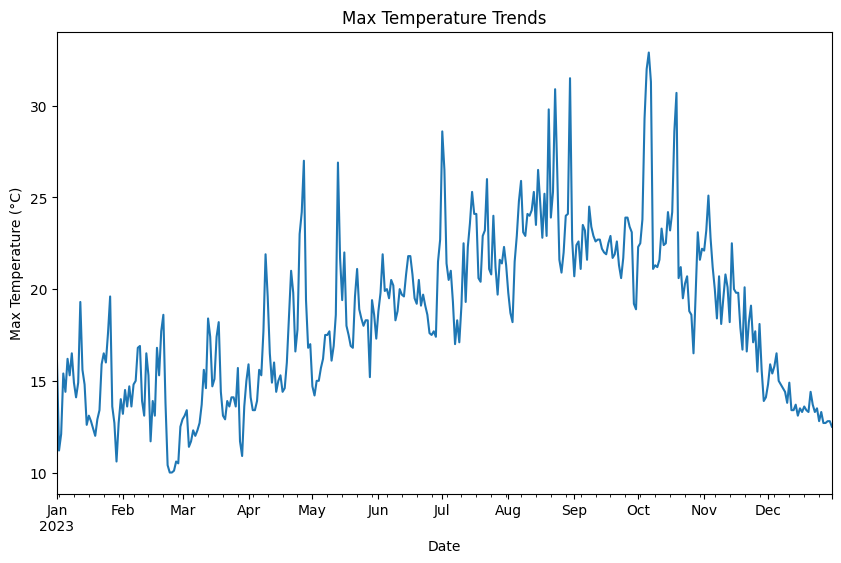

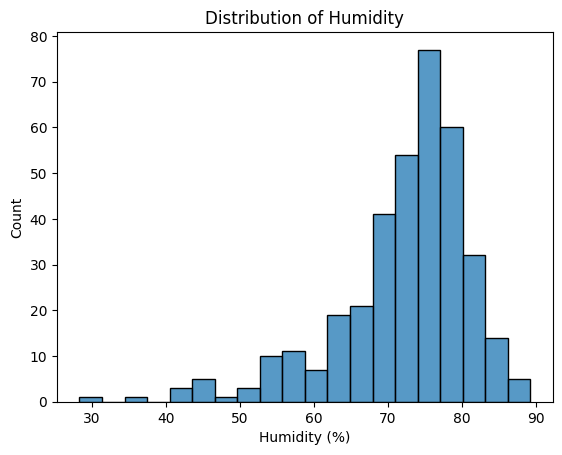

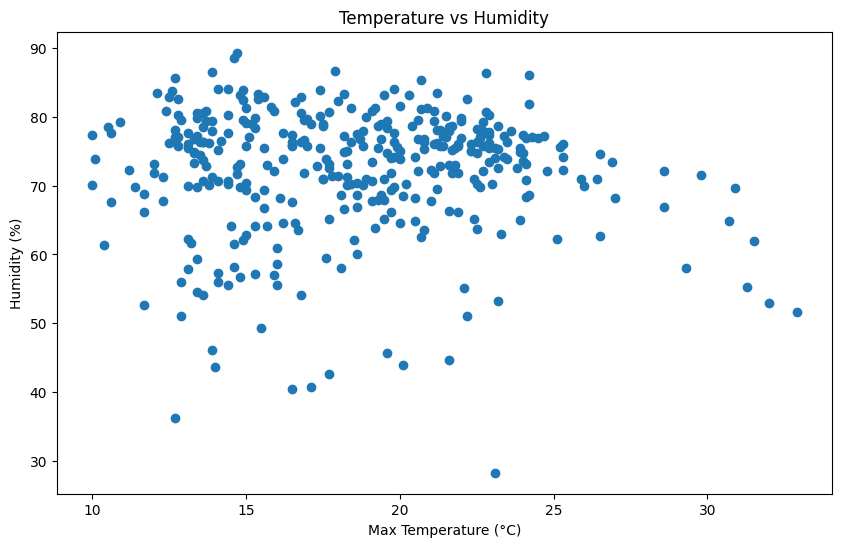

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot Temperature Trends over Time
def plot_temperature_trends(df):
    df.set_index('datetime')['tempmax'].plot(title='Max Temperature Trends', figsize=(10, 6))
    plt.xlabel('Date')
    plt.ylabel('Max Temperature (°C)')
    plt.show()

# Function to plot Distribution of Humidity
def plot_humidity_distribution(df):
    sns.histplot(df['humidity'], bins=20)
    plt.title('Distribution of Humidity')
    plt.xlabel('Humidity (%)')
    plt.show()

# Function to plot Temperature vs Humidity Scatter Plot
def plot_temp_humidity_relationship(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['tempmax'], df['humidity'])
    plt.title('Temperature vs Humidity')
    plt.xlabel('Max Temperature (°C)')
    plt.ylabel('Humidity (%)')
    plt.show()

# Call the visualization functions to create the dashboard
plot_temperature_trends(weather_df)
plot_humidity_distribution(weather_df)
plot_temp_humidity_relationship(weather_df)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [9]:
# Selecting features and target for the model
X = weather_df[['humidity', 'tempmin']]  # Example features
y = weather_df['tempmax']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
# Making predictions and evaluating the model
y_pred = model.predict(X_test)

print('Coefficients:', model.coef_)
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2):', r2_score(y_test, y_pred))


Coefficients: [-0.1548783   1.07449169]
Mean squared error: 6.508083884709876
Coefficient of determination (R^2): 0.6337657366737249


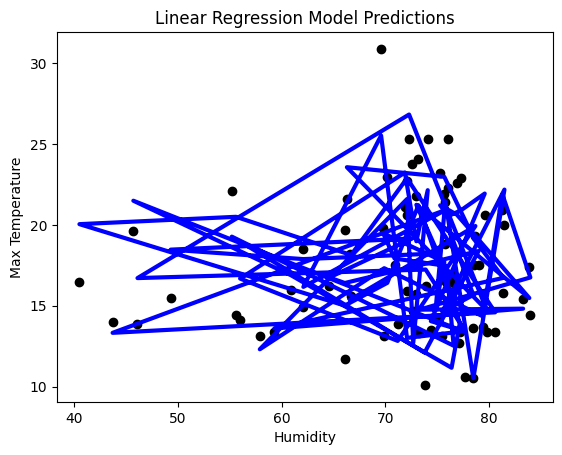

In [12]:
# Visualization of model predictions
plt.scatter(X_test['humidity'], y_test, color='black')  # Use one of your features for the X-axis
plt.plot(X_test['humidity'], y_pred, color='blue', linewidth=3)  # Use the same feature for the X-axis

plt.xlabel('Humidity')
plt.ylabel('Max Temperature')
plt.title('Linear Regression Model Predictions')
plt.show()


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a binary target variable for 'rainy' vs 'not rainy'
# Define a threshold for precipitation to determine 'rainy'
precipitation_threshold = 1.0  # You can adjust this threshold
weather_df['is_rainy'] = (weather_df['precip'] > precipitation_threshold).astype(int)

X = weather_df[['humidity', 'tempmax', 'tempmin']]  # Example features
y = weather_df['is_rainy']  # Binary target

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [14]:
# Creating and training the decision tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [15]:
# Making predictions and evaluating the model
y_pred = tree_model.predict(X_test)

print('Model Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Model Accuracy: 0.9178082191780822
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        55
           1       0.88      0.78      0.82        18

    accuracy                           0.92        73
   macro avg       0.90      0.87      0.88        73
weighted avg       0.92      0.92      0.92        73



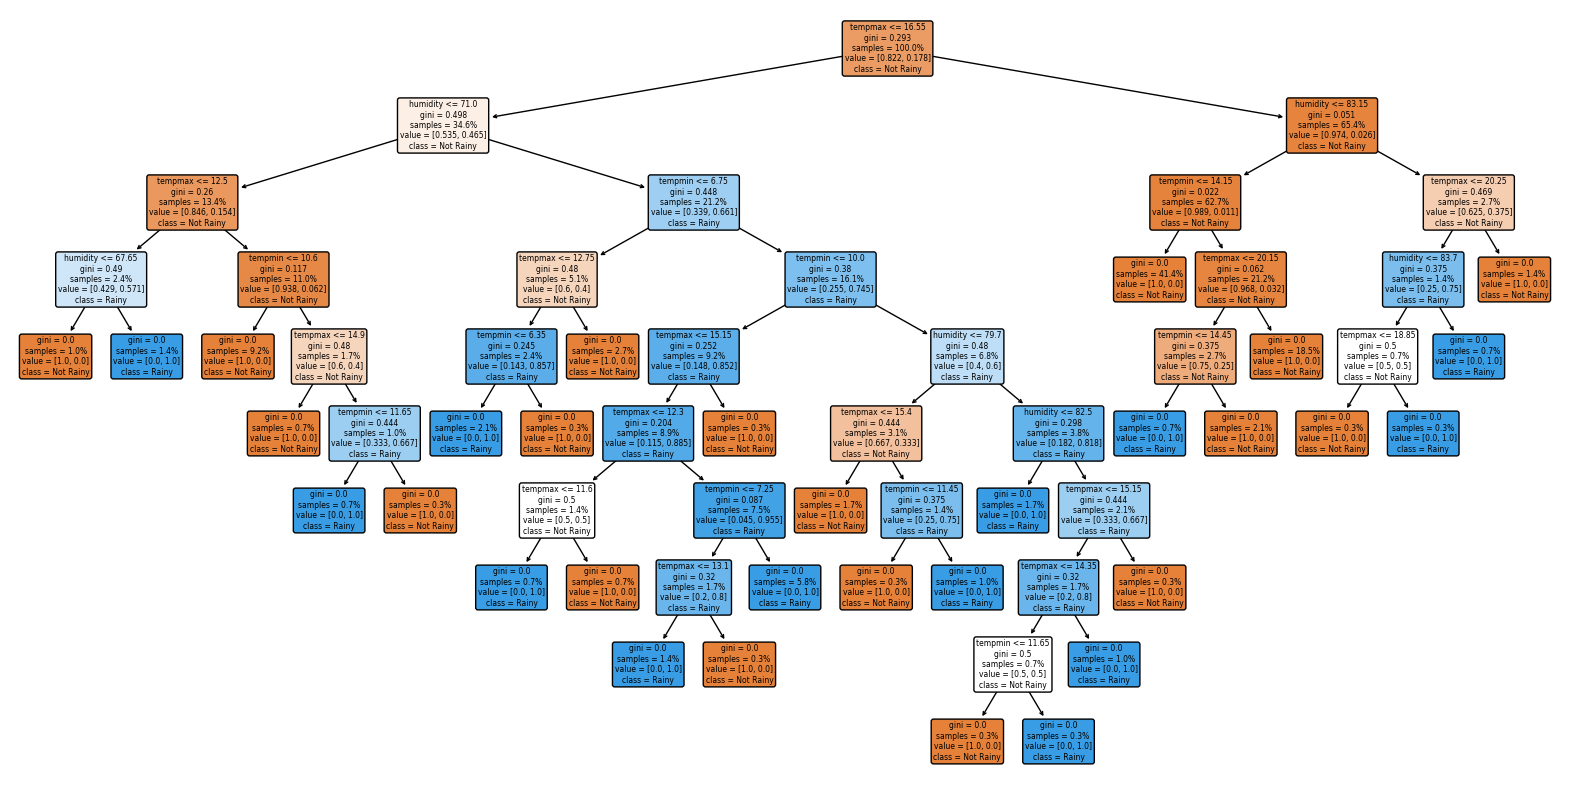

In [16]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=["Not Rainy", "Rainy"], rounded=True, proportion=True)
plt.show()



In [17]:
import ipywidgets as widgets
from IPython.display import display


In [20]:
def predict_tempmax(humidity, tempmin):
    # Create a DataFrame with the same feature names as used in model training
    input_data = pd.DataFrame({'humidity': [humidity], 'tempmin': [tempmin]})
    
    # Make prediction using the model
    predicted_tempmax = model.predict(input_data)
    
    print(f"Predicted Max Temperature: {predicted_tempmax[0]:.2f}°C")


In [21]:
humidity_slider = widgets.FloatSlider(value=50.0, min=weather_df['humidity'].min(), max=weather_df['humidity'].max(), step=1, description='Humidity:')
tempmin_slider = widgets.FloatSlider(value=10.0, min=weather_df['tempmin'].min(), max=weather_df['tempmin'].max(), step=1, description='Temp Min:')

widgets.interactive(predict_tempmax, humidity=humidity_slider, tempmin=tempmin_slider)


interactive(children=(FloatSlider(value=50.0, description='Humidity:', max=89.3, min=28.3, step=1.0), FloatSli…

In [26]:
# Function to update and display the graph based on user input
def update_graph(start_date, end_date):
    # Check if both start_date and end_date are set
    if start_date is not None and end_date is not None:
        filtered_data = weather_df[(weather_df['datetime'] >= pd.to_datetime(start_date)) & (weather_df['datetime'] <= pd.to_datetime(end_date))]
        plt.figure(figsize=(10, 5))
        plt.plot(filtered_data['datetime'], filtered_data['tempmax'], label='Max Temperature')
        plt.xlabel('Date')
        plt.ylabel('Temperature')
        plt.title('Max Temperature Over Time')
        plt.legend()
        plt.show()
    else:
        print("Please select both start and end dates.")

# Interactive date range selector
start_date_picker = widgets.DatePicker(description='Start Date')
end_date_picker = widgets.DatePicker(description='End Date')

widgets.interactive(update_graph, start_date=start_date_picker, end_date=end_date_picker)

interactive(children=(DatePicker(value=None, description='Start Date', step=1), DatePicker(value=None, descrip…

## Security Measures

We prioritize security in our Weather Prediction ML project:

- **Data Security**: Encryption, anonymization, and secure storage.
- **Code Security**: Follow secure coding practices and conduct regular code reviews.
- **Environment Security**: Keep dependencies up-to-date and use virtual environments.
- **Notebook Access Control**: Authenticate users with tokens.
- **Data Backups**: Regularly backup data for recovery.
- **Logging and Monitoring**: Comprehensive logging and monitoring.
- **Privacy Compliance**: Adhere to privacy regulations and obtain user consent.

These measures ensure industry-appropriate security standards.

> For detailed configurations and code snippets, refer to the project's documentation and codebase.



## Monitoring and Maintenance Strategies

**Monitoring Plan:**
- Regularly evaluate model performance with new data.
- Conduct API health checks for data continuity.
- Set up alerts for critical issues.

**Maintenance Plan:**
- Periodically retrain models with updated data.
- Regularly update and clean the dataset.
- Maintain software dependencies and libraries.

**Logging and Error Handling:**
- Implement logging for key processes like data loading, model training, and predictions.
- Develop error handling mechanisms for robustness.

**Versioning and Testing:**
- Employ version control for models and datasets.
- Plan for automated testing in critical functions.

**Upgrade Strategies:**
- Review and upgrade project components periodically for enhancements.
